# Visualización

En este notebook se mira la distribución de tuits por día atendiendo a su polarización obtenida en otros apartados.

In [62]:
import seaborn as sns, numpy as np, pandas as pd, matplotlib.pyplot as plt

## Producción de tuits por día

In [63]:
df = pd.read_csv('../data/vacunes_100rt.csv', index_col=0)
df.date = pd.to_datetime(df.date)
df.date = df.date.dt.date
df.head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers,coordinates,place,username
0,https://twitter.com/LaBandaPindonga/status/138...,2021-04-30,"Anoche dijo Bobeli ""no tenemo' vacuna' po'que ...","Anoche dijo Bobeli ""no tenemo' vacuna' po'que ...",1388281755816321026,"{'username': 'LaBandaPindonga', 'displayname':...",[],[],31,400,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,NaN,NaN,NaN,NaN,NaN,NaN,LaBandaPindonga
1,https://twitter.com/HenryChinaski67/status/138...,2021-04-30,Avanzan las negociaciones para producir íntegr...,Avanzan las negociaciones para producir íntegr...,1388274839417495553,"{'username': 'HenryChinaski67', 'displayname':...",[],[],19,157,...,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,NaN,HenryChinaski67
2,https://twitter.com/ribaniez1/status/138827222...,2021-04-30,Castro al médico israelí:\nFue efectivo el con...,Castro al médico israelí:\nFue efectivo el con...,1388272223866265602,"{'username': 'ribaniez1', 'displayname': 'Raúl...",[],[],25,248,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,NaN,NaN,NaN,NaN,NaN,NaN,ribaniez1
3,https://twitter.com/EcarleF/status/13882572630...,2021-04-30,El Laboratorio Richmond en Argentina va a fabr...,El Laboratorio Richmond en Argentina va a fabr...,1388257263085830144,"{'username': 'EcarleF', 'displayname': 'Soy Ed...",[],[],22,293,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN,NaN,NaN,EcarleF
4,https://twitter.com/DrCKambourian/status/13882...,2021-04-30,Presidente/ Ministra: Dado que ayer estuvieron...,Presidente/ Ministra: Dado que ayer estuvieron...,1388252744176259074,"{'username': 'DrCKambourian', 'displayname': '...",[],[],228,2961,...,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,DrCKambourian


<AxesSubplot:xlabel='date', ylabel='Count'>

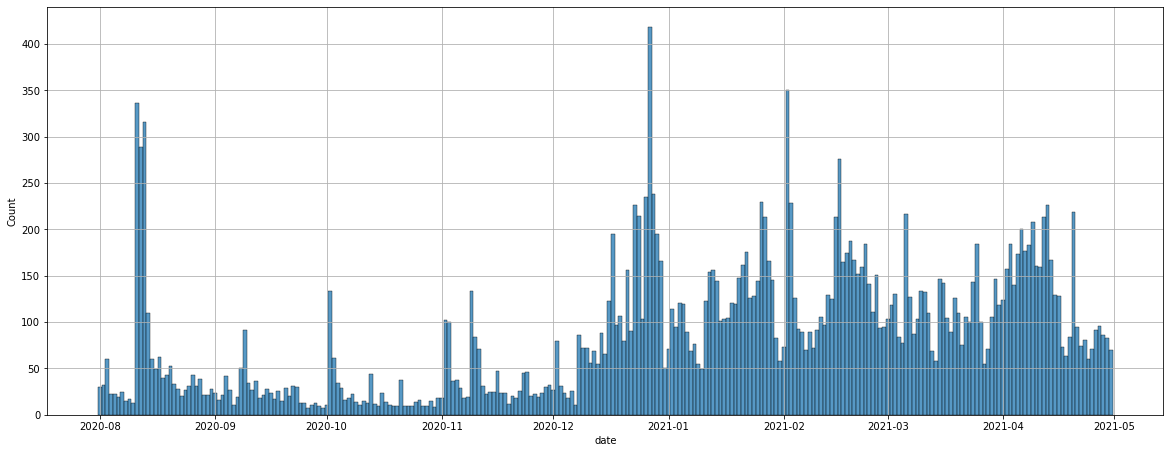

In [64]:
fig, ax = plt.subplots(figsize=(20,7.5))
ax.grid()
sns.histplot(data=df, x='date', ax=ax)

## Producción de tuits polarizados según TextBlob

In [109]:
df = pd.read_csv('../data/EN/vacunes_100rt_en_textblob.csv', index_col=0)
df.date = pd.to_datetime(df.date)
df.date = df.date.dt.date


In [110]:
df[df.polarity==0].shape

(7059, 27)

In [111]:
df.loc[ (df.polarity >= -1) & (df.polarity <= .05), 'label' ] = 'Negative'
df.loc[ (df.polarity > -.05) & (df.polarity < .05), 'label' ] = 'Neutral'
df.loc[ (df.polarity >= .05) & (df.polarity <= 1), 'label' ] = 'Positive'

In [113]:
labels_dummies = pd.get_dummies(df.label)
df_day = pd.concat([df, labels_dummies], axis=1)
df_day = df_day[['date'] + labels_dummies.columns.tolist() ].groupby(by='date').sum().reset_index().sort_values('date')
df_day

,date,Negative,Neutral,Positive
0,2020-08-01,5,11,14
1,2020-08-02,5,12,15
2,2020-08-03,4,25,31
3,2020-08-04,6,6,10
4,2020-08-05,1,9,12
...,...,...,...,...
268,2021-04-26,18,38,35
269,2021-04-27,17,36,43
270,2021-04-28,14,36,36
271,2021-04-29,22,20,41


### En términos absolutos

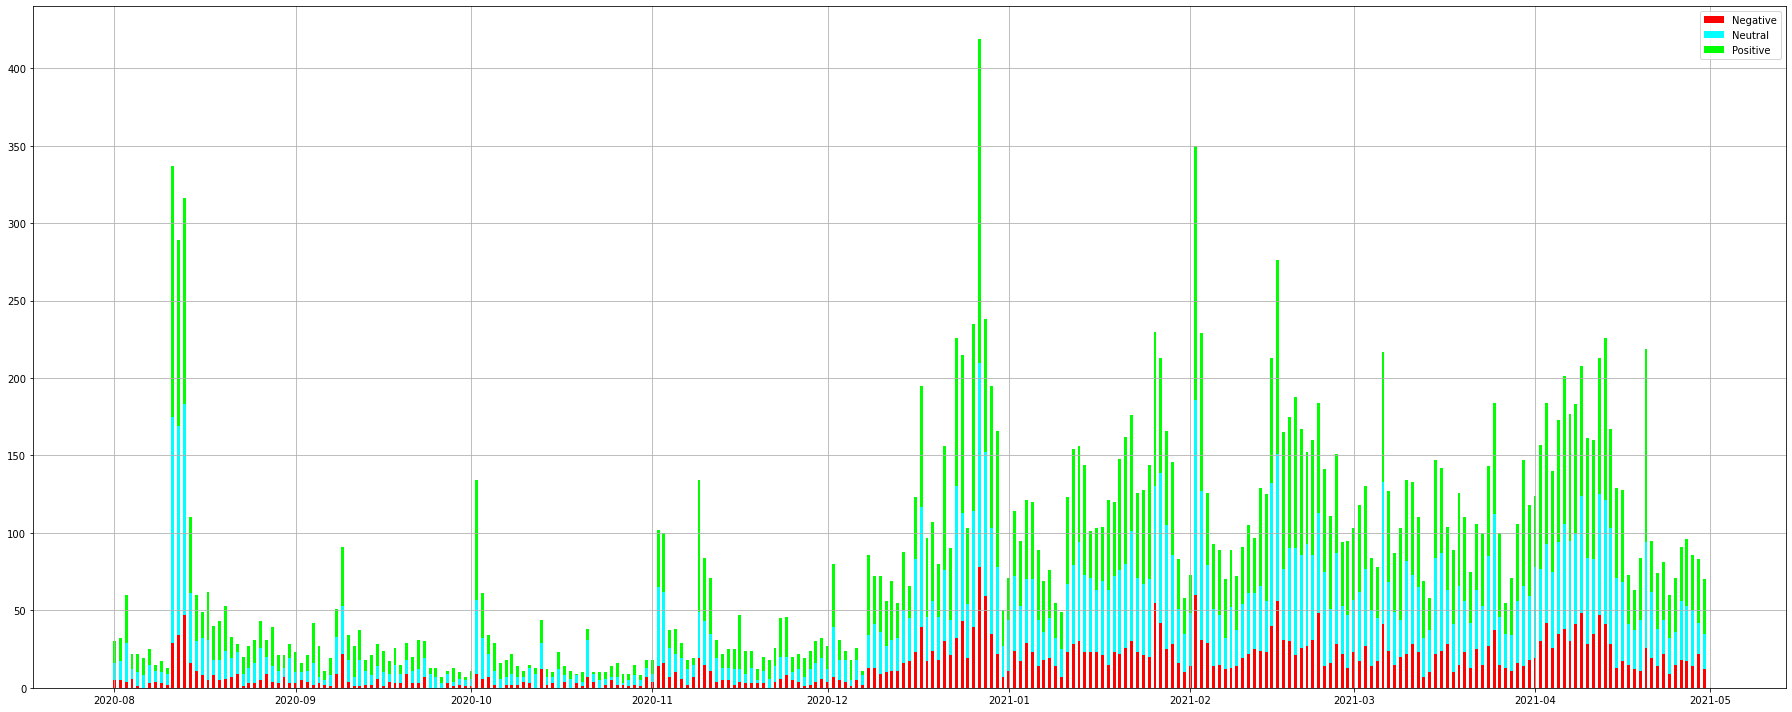

In [114]:
dates = df_day.date
negative = df_day.Negative
neutral = df_day.Neutral
positive = df_day.Positive

fig, ax = plt.subplots(figsize=(25,10))
#sns.set_color_codes("pastel")
#sns.barplot(data=ranking[ranking.label==0], x="user_search",  y='percentage', hue='label', ax=ax)#, hue="label", multiple="stack", ax=ax)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_title('Producción total por usuario')
#ax.grid()
#ax.legend(loc='upper right')
#fig.tight_layout()

width = 0.5       # the width of the bars: can also be len(x) sequence

#fig, ax = plt.subplots()

ax.bar(dates, negative, width, label='Negative', color='red')
ax.bar(dates, neutral, width, label='Neutral', bottom=negative, color='#00FFFF')
ax.bar(dates, positive, width, label='Positive', bottom=negative + neutral, color='#00FF00')
#ax.bar(dates, positive, width, label='Positive', color='green')
ax.legend()
ax.grid()


#ax.set_xticklabels(dates, rotation=90);

fig.tight_layout()
#fig.savefig('polarizacion_politicos.pdf')
#fig.savefig('polarizacion_politicos.png')

### En términos relativos

In [115]:
production_per_day = df_day.sum(axis=1)
df_day_norm = df_day.copy()
for col in df_day.columns[1:]:
    df_day_norm[col] /= production_per_day

In [116]:
df_day_norm

,date,Negative,Neutral,Positive
0,2020-08-01,0.166667,0.366667,0.466667
1,2020-08-02,0.156250,0.375000,0.468750
2,2020-08-03,0.066667,0.416667,0.516667
3,2020-08-04,0.272727,0.272727,0.454545
4,2020-08-05,0.045455,0.409091,0.545455
...,...,...,...,...
268,2021-04-26,0.197802,0.417582,0.384615
269,2021-04-27,0.177083,0.375000,0.447917
270,2021-04-28,0.162791,0.418605,0.418605
271,2021-04-29,0.265060,0.240964,0.493976


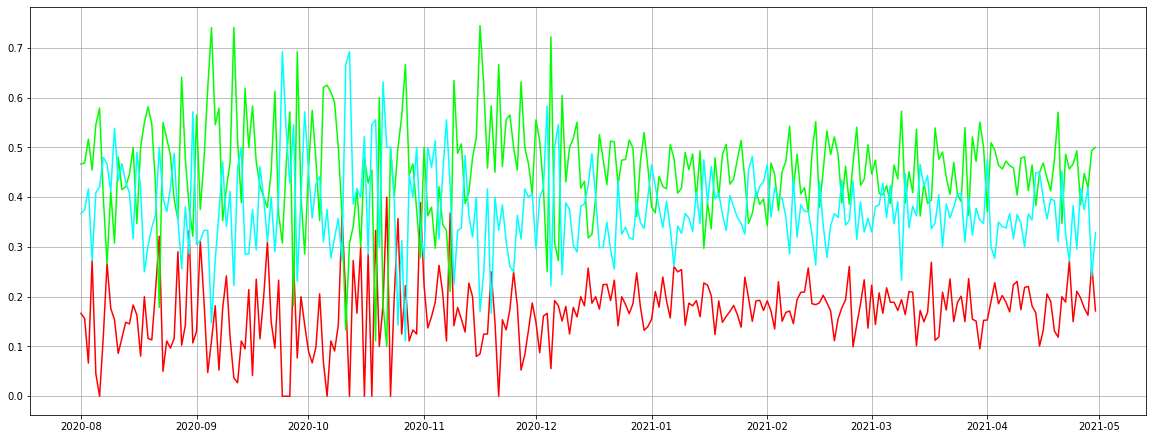

In [118]:
fig, ax = plt.subplots(figsize=(20, 7.5))
ax.grid()

ax.plot(df_day_norm.date, df_day_norm.Negative, color = 'red')
ax.plot(df_day_norm.date, df_day_norm.Positive, color = '#00FF00')
ax.plot(df_day_norm.date, df_day_norm.Neutral, color='#00FFFF')

### Diferencia de la proporción de tuits positivos y negativos

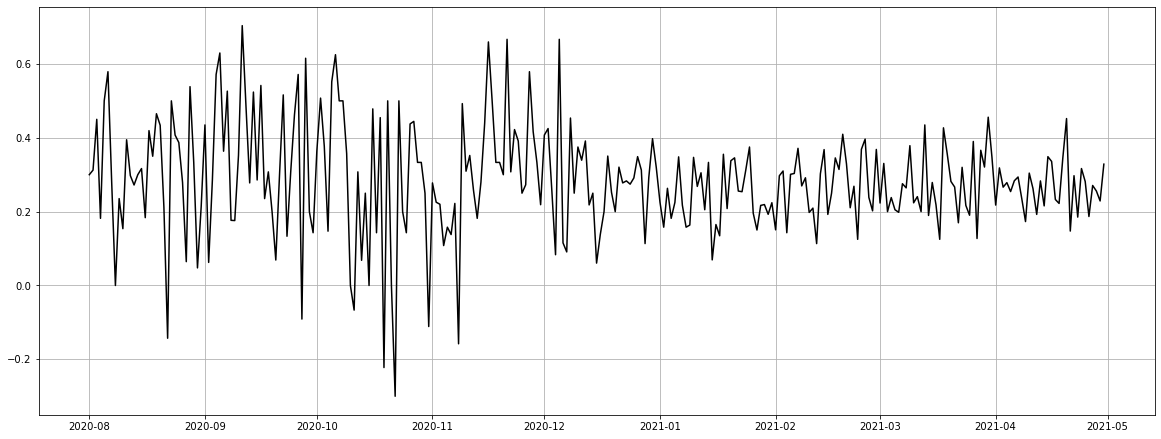

In [119]:
fig, ax = plt.subplots(figsize=(20, 7.5))
ax.grid()

ax.plot(df_day_norm.date, df_day_norm.Positive - df_day_norm.Negative, color = 'black')